## Final Notebook Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_df = pd.read_csv('data/kc_house_data.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
housing_df['datetime'] = pd.to_datetime(housing_df['date'])
housing_df['soldyear'] = housing_df['datetime'].dt.year
housing_df['age_when_sold'] = housing_df['soldyear'] - housing_df['yr_built']

In [5]:
housing_df['grade_num'] = housing_df['grade'].str.split()
housing_df['grade_num'] = housing_df['grade_num'].str[0]
housing_df['grade_num'] = housing_df['grade_num'].astype(int)

In [6]:
housing_df['sqft_basement'] = housing_df['sqft_living'] - housing_df['sqft_above']
housing_df['Basement'] = None
housing_df['Basement'] = housing_df['sqft_basement'].map(lambda x: False if x == 0 else True)
housing_df['Basement'] = housing_df['Basement'].astype(int)

In [7]:
replace_dict = {0.75: 1, 1.75: 2, 2.75: 3, 3.75: 4, 4.75: 5, 5.75: 6, 6.75: 7, 7.75: 8, 
                1.25: 1.5, 2.25: 2.5, 3.25: 3.5, 4.25: 4.5, 5.25: 5.5, 6.25: 6.5}
housing_df['bathrooms'] = housing_df['bathrooms'].replace(replace_dict)

In [8]:
housing_df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [9]:
replace_dict2 = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
housing_df['condition'] = housing_df['condition'].replace(replace_dict2)

In [10]:
from sklearn.impute import SimpleImputer
wtr_col = housing_df[['waterfront']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NO')
imputer.fit(wtr_col)
waterfront_imputed = imputer.transform(wtr_col)
housing_df.waterfront = waterfront_imputed

In [11]:
from sklearn.preprocessing import OrdinalEncoder
wtr_col = housing_df[['waterfront']]
encoder_wtr = OrdinalEncoder()
encoder_wtr.fit(wtr_col)
encoded_wtr = encoder_wtr.transform(wtr_col)
encoded_wtr = encoded_wtr.flatten()
housing_df.waterfront = encoded_wtr

In [12]:
from sklearn.impute import SimpleImputer
view_col = housing_df[['view']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NONE')
imputer.fit(view_col)
view_imputed = imputer.transform(view_col)
housing_df.view = view_imputed

In [13]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
datetime            0
soldyear            0
age_when_sold       0
grade_num           0
Basement            0
dtype: int64

In [14]:
housing_ols = housing_df.drop(['datetime', 'date', 'soldyear', 'yr_built', 'lat', 'long',
'zipcode', 'sqft_above', 'sqft_lot15', 'sqft_living15', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated'], axis = 1)

In [15]:
housing_ols.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,age_when_sold,grade_num,Basement
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0.0,NONE,3,59,7,0
1,6414100192,538000.0,3,2.5,2570,7242,2.0,0.0,NONE,3,63,7,1
2,5631500400,180000.0,2,1.0,770,10000,1.0,0.0,NONE,3,82,6,0
3,2487200875,604000.0,4,3.0,1960,5000,1.0,0.0,NONE,5,49,7,1
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0.0,NONE,3,28,8,0


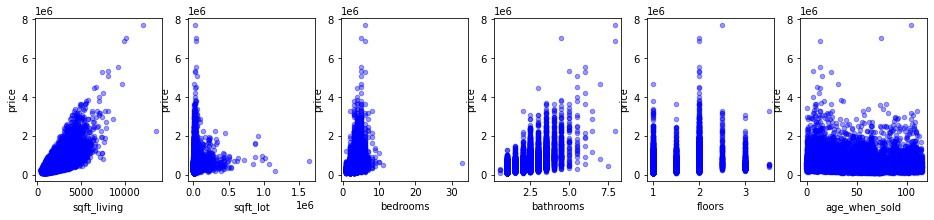

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'age_when_sold'], axes):
    housing_ols.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [26]:
f = 'price ~ sqft_living'

In [27]:
simple_model = ols(formula = f, data = housing_ols).fit()
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:55:29   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
housing_ols.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,age_when_sold,grade_num,Basement
id,1.000000,-0.016772,0.001150,0.002964,-0.012241,-0.131911,0.018608,-0.003599,-0.023803,-0.021458,0.008188,0.002585
price,-0.016772,1.000000,0.308787,0.524118,0.701917,0.089876,0.256804,0.264306,0.036056,-0.053890,0.667951,0.180082
bedrooms,0.001150,0.308787,1.000000,0.514430,0.578212,0.032471,0.177944,-0.002127,0.026496,-0.155817,0.356563,0.162186
bathrooms,0.002964,0.524118,0.514430,1.000000,0.749400,0.089166,0.475999,0.065804,-0.107609,-0.493269,0.657927,0.189898
sqft_living,-0.012241,0.701917,0.578212,0.749400,1.000000,0.173453,0.353953,0.104637,-0.059445,-0.318592,0.762779,0.204324
sqft_lot,-0.131911,0.089876,0.032471,0.089166,0.173453,1.000000,-0.004814,0.021459,-0.008830,-0.052853,0.114731,-0.035227
floors,0.018608,0.256804,0.177944,0.475999,0.353953,-0.004814,1.000000,0.020797,-0.264075,-0.489514,0.458794,-0.256545
waterfront,-0.003599,0.264306,-0.002127,0.065804,0.104637,0.021459,0.020797,1.000000,0.016648,0.024406,0.082818,0.040061
condition,-0.023803,0.036056,0.026496,-0.107609,-0.059445,-0.008830,-0.264075,0.016648,1.000000,0.360836,-0.146896,0.135211
age_when_sold,-0.021458,-0.053890,-0.155817,-0.493269,-0.318592,-0.052853,-0.489514,0.024406,0.360836,1.000000,-0.448322,0.167723


In [20]:
from sklearn.preprocessing import OneHotEncoder
condition_ohe = housing_ols[['condition']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
cond_encoded_ohe = pd.DataFrame (ohe.fit_transform(condition_ohe))
cond_encoded_ohe.columns = ohe.get_feature_names(['condition'])

In [21]:
housing_pred = housing_ols
housing_pred = pd.concat([housing_ols, cond_encoded_ohe], axis = 1)
housing_pred.drop('condition', axis = 1, inplace=True)
housing_pred.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,age_when_sold,grade_num,Basement,condition_1,condition_2,condition_3,condition_4,condition_5
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0.0,NONE,59,7,0,0.0,0.0,1.0,0.0,0.0
1,6414100192,538000.0,3,2.5,2570,7242,2.0,0.0,NONE,63,7,1,0.0,0.0,1.0,0.0,0.0
2,5631500400,180000.0,2,1.0,770,10000,1.0,0.0,NONE,82,6,0,0.0,0.0,1.0,0.0,0.0
3,2487200875,604000.0,4,3.0,1960,5000,1.0,0.0,NONE,49,7,1,0.0,0.0,0.0,0.0,1.0
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0.0,NONE,28,8,0,0.0,0.0,1.0,0.0,0.0


In [22]:
from sklearn.preprocessing import OneHotEncoder
view_ohe = housing_ols[['view']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(view_ohe)
view_encoded = ohe.transform(view_ohe)

In [23]:
view_encoded = pd.DataFrame(
    view_encoded,
    columns=ohe.categories_[0],
    index=housing_pred.index)
view_encoded

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,1.0
21593,0.0,0.0,0.0,0.0,1.0
21594,0.0,0.0,0.0,0.0,1.0
21595,0.0,0.0,0.0,0.0,1.0


In [25]:
housing_pred = pd.concat([housing_pred, view_encoded], axis = 1)
housing_pred.rename(columns={"AVERAGE": "view_avg", "EXCELLENT": "view_excel", "FAIR": "view_fair", "GOOD": "view_good", "NONE": "view_no"}, inplace=True)
housing_pred.drop('view', axis = 1, inplace=True)
housing_pred.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,age_when_sold,grade_num,...,condition_1,condition_2,condition_3,condition_4,condition_5,view_avg,view_excel,view_fair,view_good,view_no
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0.0,59,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6414100192,538000.0,3,2.5,2570,7242,2.0,0.0,63,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5631500400,180000.0,2,1.0,770,10000,1.0,0.0,82,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2487200875,604000.0,4,3.0,1960,5000,1.0,0.0,49,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0.0,28,8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
